# Gradient Descent: 勾配下降法

In [10]:
from functools import partial

In [11]:
# vの各要素を２乗して合計する
def sum_of_squares(v):
    return sum(v_i **2 for v_i in v)

In [3]:
# xにおける微分係数(fが１変数の関数である場合)
def difference_quotient(f, x, h):
    return (f(x+h)  - f(x))/h

In [4]:
def square(x):
    return x * x

In [5]:
# 上の式の導関数（微分）
def derivative(x):
    return 2 * x

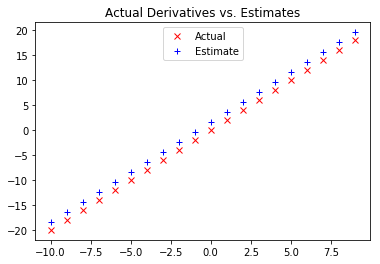

In [25]:
# 微分係数を求めて、推定値と実際値の差分を確認する
derivative_estimate = partial(difference_quotient, square, h=1.5)#partial: オブジェクト functools.partial(func, /, *args, **keywords)

import matplotlib.pyplot as plt
x = range(-10, 10)
plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')#導関数
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate')#微分係数
plt.legend(loc=9)
plt.show()

In [26]:
# 多変数関数だった場合の差分商計算
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [29]:
# 勾配
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

In [30]:
# 移動
def step(v, direction, step_size):
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

In [31]:
# 勾配
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

### ３次元ベクトルについて勾配を使ってパラメータの最小値を求める

In [36]:
def distance(a, b):
    ??

In [38]:
import random

v = [random.randint(-10, 10) for i in range(3)]
tolerance = 0.0000001
count = 1
while True:
    print('step ', count)
    gradient = sum_of_squares_gradient(v)
    print('gradient: ', gradient)
    next_v = step(v, gradient, -0.01)
    print('next v: ', next_v)
    if distance(next_v, v) < tolerance:
        print('finish!')
        break
    v = next_v

step  1
gradient:  [-4, 10, -10]
next v:  [-1.96, 4.9, -4.9]


TypeError: '<' not supported between instances of 'list' and 'float'

### 最善の移動量

In [40]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf') # Pythonにおける「無限大」
    return safe_f

### 勾配下降法

In [41]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]
        
        #誤差関数を最小化する値を選ぶ
        next_theta = min(next_thetas, key = target_fn)
        next_value = target_fn(next_theta)
        
        #収束したなら、終了する
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value